In [1]:
import matplotlib.pyplot as plt
import numpy as np

''' Evaluation of actual function '''
def eval_function(x):
    return np.cos(8 * np.pi * x)

''' a: the x-coordinate of the starting point
    b: the x-coordinate of the ending point (b > a)
    i: number of equally-divided intervals between a and b
    return the coefficient matrix O {(aj, bj, cj, dj)}
'''
def S_coefficient(a, b, i):
    # x-coordinates of points for interpolations
    X = np.linspace(a, b , num=i + 1)
    # y-coordinates of point for interpolations
    A = [eval_function(x) for x in X]
    # equally-divided interval of the interpolation
    h = (b - a) / i
    
    # solve the tridiagonal linear system
    T = [(1, 0, 0)] 
    for k in range(1, i):
        l = (4 - T[k - 1][1]) * h
        m = h / l
        t = (A[k + 1] - 2 * A[k] + A[k - 1]) * 3 / h
        z = (t - h * T[k - 1][2]) / l
        T.append((l, m, z))
        
    T.append((1, 0, 0))

    O = {}
    O[i] = (0, 0, 0, 0) 
    for k in reversed(range(i)):
        c = T[k][2] - T[k][1] * O[k + 1][2]
        b = (A[k + 1] - A[k]) / h - h * (O[k + 1][2] + 2 * c) / 3
        d = (O[k + 1][2] - c) / 3 / h
        O[k] = (A[k], b, c, d)
        
    return O

''' O: the coefficient matrix O {(aj, bj, cj, dj)}
    x: the x-coordinate of the interpolating point
    a: the x-coordinate of the starting point
    h: the equally-divided interval of the interpolation
'''
def eval_S(O, x, a, h):
    k = (x - a) // h
    x0 = a + k * h
    p = sum(O[k][n] * (x - x0)**n for n in range(4))
    return p

In [2]:
# Set up points for evaluations
a, b, i = 0.05, 0.95, 97

X = np.linspace(a, b , num=i + 1)
# Compute the evaluations of the actual function
Y = [eval_function(x) for x in X]

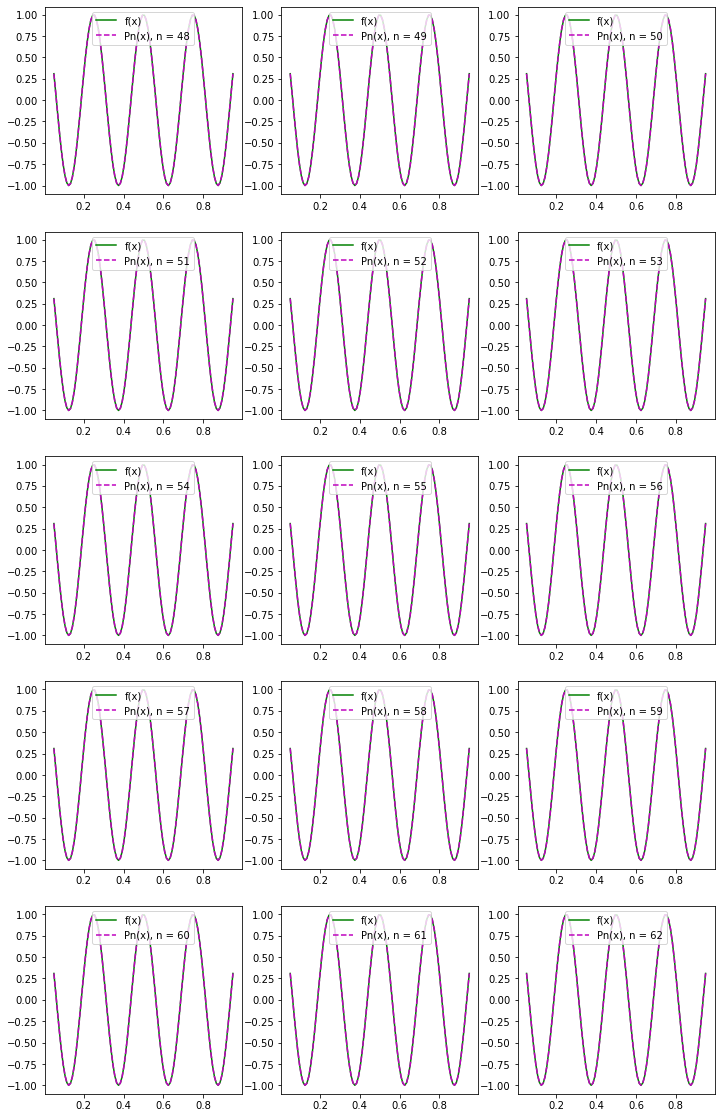

In [3]:
min_nodes, max_nodes = 48, 62
n_rows = (max_nodes + 1 - min_nodes) // 3
fig, axes = plt.subplots(nrows=n_rows, ncols=3)
fig.set_size_inches(12, 20)

# Set up points for interpolation
c, d = 0, 1

# Plot a family of interpolating polynomials with order from 18, 32
for k in range(min_nodes, max_nodes + 1):
    # Compute the coefficient matrix O {(aj, bj, cj, dj)}
    O = S_coefficient(c, d, k - 1)
    # Evaluate the approximation by the Natural Cubic Spline interpolation
    h = (d - c) / (k - 1)
    S = [eval_S(O, x, c, h) for x in X]
    # Set the plot with 3 columns
    ax = axes[(k - min_nodes) // 3][(k - min_nodes) % 3]
    # Plot the function
    ax.plot(X, Y, linestyle='-', color='g', label='f(x)')
    # Plot the interpolating approximation from Lagrange's algorithm 
    ax.plot(X, S, linestyle='--', color='m', label='Pn(x), n = {}'.format(k))
    ax.legend(loc='upper center')
plt.show() 

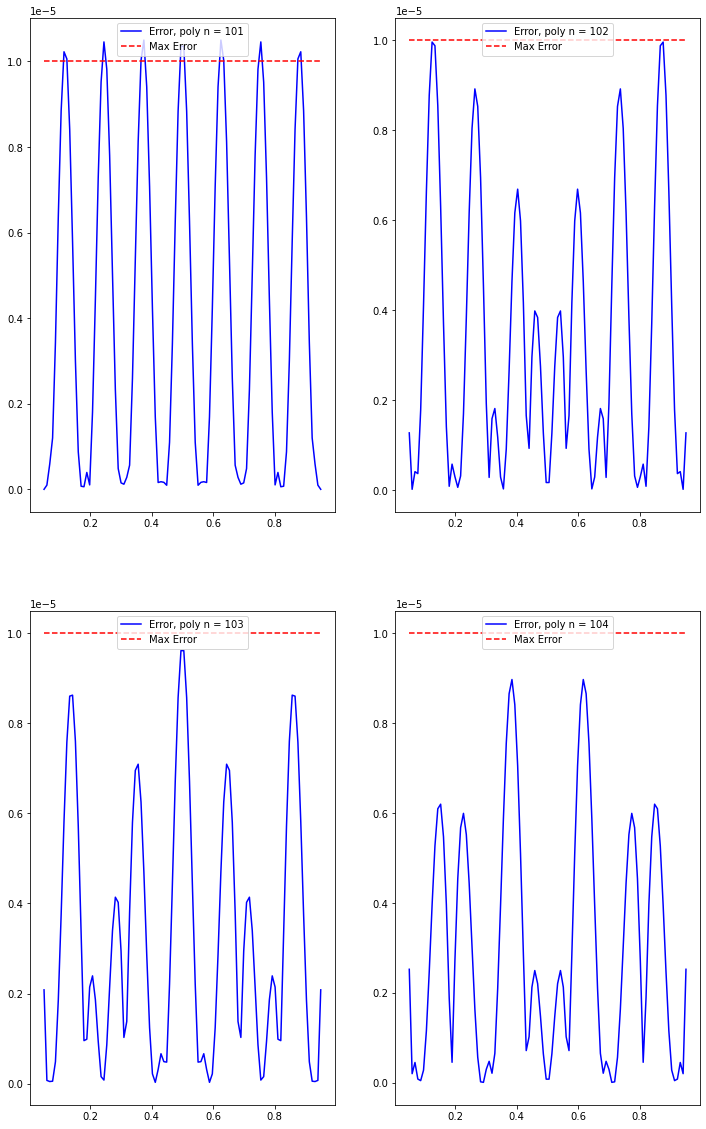

In [4]:
min_nodes, max_nodes = 101, 104
n_rows = (max_nodes + 1 - min_nodes) // 2
fig, axes = plt.subplots(nrows=n_rows, ncols=2)
fig.set_size_inches(12, 20)
max_error = 10**-5

# Set up points for interpolation
c, d = 0, 1

for k in range(min_nodes, max_nodes + 1):
    # Compute the coefficient matrix O {(aj, bj, cj, dj)}
    O = S_coefficient(c, d, k - 1)
    # Evaluate the approximation by the Natural Cubic Spline interpolation
    h = (d - c) / (k - 1)
    S = [eval_S(O, x, c, h) for x in X]
    # Compute the errors between the real and the interpolated values
    E = [abs(y - s) for y, s in zip(Y, S)]   
    # Plot the errors vs. interpolating x-coordinates
    ax = axes[(k - min_nodes) // 2][(k - min_nodes) % 2]
    ax.plot(X, E, linestyle='-', color='b', label='Error, poly n = {}'.format(k))
    ax.plot([a, b], [max_error, max_error], linestyle='--', color='r', label='Max Error')
    ax.legend(loc='upper center')
plt.show() 